In [10]:
import stanfordnlp

model_dir='/pi/ai/corenlp'
nlp_zh = stanfordnlp.Pipeline(models_dir=model_dir, 
                              lang='zh',
                              treebank='zh_gsd')
nlp_ja = stanfordnlp.Pipeline(models_dir=model_dir, 
                              lang='ja',
                              treebank='ja_gsd')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_tokenizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd.pretrain.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_lemmatizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_parser.pt', 'pretrain_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd.pretrain.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Done loading processors!
---
Use device: cpu
-

In [18]:
def analyse(sents, nlp):
    doc = nlp(sents)
    print(*[f'text: {word.text+" "}\tlemma: {word.lemma}\tupos: {word.upos}\txpos: {word.xpos}' for sent in doc.sentences for word in sent.words], sep='\n')
    doc.sentences[0].print_dependencies()

# sents='我是一个中学生。'
# sents='我是一個高中生。'
sents='我是一個高中生'
analyse(sents, nlp_zh)

text: 我 	lemma: 我	upos: PRON	xpos: PRP
text: 是 	lemma: 是	upos: AUX	xpos: VC
text: 一 	lemma: 一	upos: NUM	xpos: CD
text: 個 	lemma: 個	upos: NOUN	xpos: NNB
text: 高中 	lemma: 高中	upos: NOUN	xpos: NN
text: 生 	lemma: 生	upos: PART	xpos: SFN
('我', '6', 'dep')
('是', '6', 'cop')
('一', '4', 'nummod')
('個', '6', 'nmod')
('高中', '6', 'case:suff')
('生', '0', 'root')


In [15]:
sents='私は中学生です。'
analyse(sents, nlp_ja)

text: 私 	lemma: 私	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: 中学生 	lemma: 中学生	upos: NOUN	xpos: _
text: です 	lemma: だ	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私', '3', 'nsubj')
('は', '1', 'case')
('中学生', '0', 'root')
('です', '3', 'cop')
('。', '3', 'punct')


In [16]:
analyse('私は高校生です。', nlp_ja)

text: 私 	lemma: 私	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: 高校生 	lemma: 高校生	upos: NOUN	xpos: _
text: です 	lemma: だ	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私', '3', 'nsubj')
('は', '1', 'case')
('高校生', '0', 'root')
('です', '3', 'cop')
('。', '3', 'punct')


Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_tokenizer.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd.pretrain.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_lemmatizer.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd_parser.pt', 'pretrain_path': '/pi/ai/corenlp/ja_gsd_models/ja_gsd.pretrain.pt', 'lang': 'ja', 'shorthand': 'ja_gsd', 'mode': 'predict'}
Done loading processors!
---
text: 私 	lemma: 私

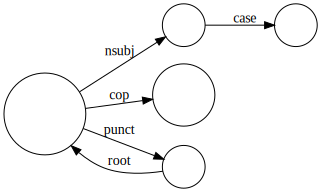

In [2]:
from sagas.nlu.corenlp_helper import CoreNlp, CoreNlpViz, langs
nlp_ja=langs['ja']()
ana=lambda sents: CoreNlpViz().analyse(sents, nlp_ja)
ana('私は高校生です。')

text: 私 	lemma: 私	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: ドイツ 	lemma: ドイツ	upos: PROPN	xpos: _
text: 出身 	lemma: 出身	upos: NOUN	xpos: _
text: です 	lemma: だ	upos: AUX	xpos: _
('私', '4', 'nsubj')
('は', '1', 'case')
('ドイツ', '4', 'compound')
('出身', '0', 'root')
('です', '4', 'cop')


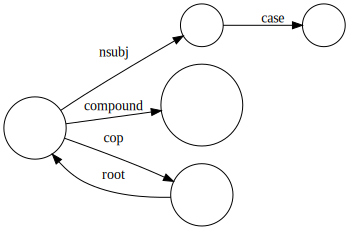

In [4]:
ana('私はドイツ出身です')

text: 私達 	lemma: 私達	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: 月 	lemma: 月	upos: NOUN	xpos: _
text: に 	lemma: に	upos: ADP	xpos: _
text: 達する 	lemma: 達する	upos: VERB	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私達', '5', 'nsubj')
('は', '1', 'case')
('月', '5', 'iobj')
('に', '3', 'case')
('達する', '0', 'root')
('。', '5', 'punct')


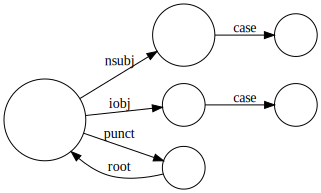

In [5]:
ana('b')

text: 私たち 	lemma: 私たち	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: すべて 	lemma: すべて	upos: NOUN	xpos: _
text: を 	lemma: を	upos: ADP	xpos: _
text: 可能 	lemma: 可能	upos: ADJ	xpos: _
text: に 	lemma: だ	upos: AUX	xpos: _
text: し 	lemma: する	upos: AUX	xpos: _
text: ます 	lemma: ます	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私たち', '5', 'nsubj')
('は', '1', 'case')
('すべて', '5', 'obj')
('を', '3', 'case')
('可能', '0', 'root')
('に', '5', 'aux')
('し', '5', 'aux')
('ます', '5', 'aux')
('。', '5', 'punct')


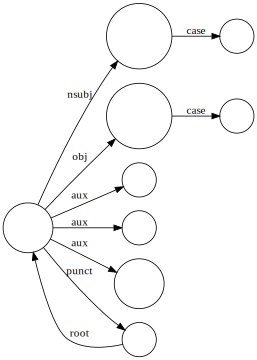

In [6]:
ana('私たちはすべてを可能にします。')

text: 私たち 	lemma: 私たち	upos: PRON	xpos: _
text: は 	lemma: は	upos: ADP	xpos: _
text: すべて 	lemma: すべて	upos: NOUN	xpos: _
text: を 	lemma: を	upos: ADP	xpos: _
text: 可能 	lemma: 可能	upos: ADJ	xpos: _
text: に 	lemma: だ	upos: AUX	xpos: _
text: し 	lemma: する	upos: AUX	xpos: _
text: ます 	lemma: ます	upos: AUX	xpos: _
text: 。 	lemma: 。	upos: PUNCT	xpos: _
('私たち', '5', 'nsubj')
('は', '1', 'case')
('すべて', '5', 'obj')
('を', '3', 'case')
('可能', '0', 'root')
('に', '5', 'aux')
('し', '5', 'aux')
('ます', '5', 'aux')
('。', '5', 'punct')


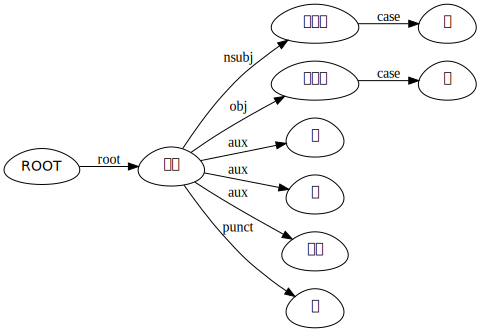

In [2]:
import sagas
sagas.dia('ja').ana_s('私たちはすべてを可能にします。')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/pi/ai/corenlp/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Done loading processors!
---
text: it 	lemma: 

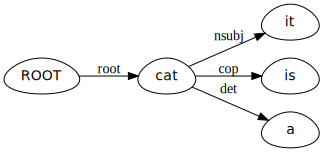

In [3]:
sagas.dia('en').ana_s('it is a cat')

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_tokenizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_tagger.pt', 'pretrain_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd.pretrain.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_lemmatizer.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd_parser.pt', 'pretrain_path': '/pi/ai/corenlp/zh_gsd_models/zh_gsd.pretrain.pt', 'lang': 'zh', 'shorthand': 'zh_gsd', 'mode': 'predict'}
Done loading processors!
---
text: 達沃斯 	lemma:

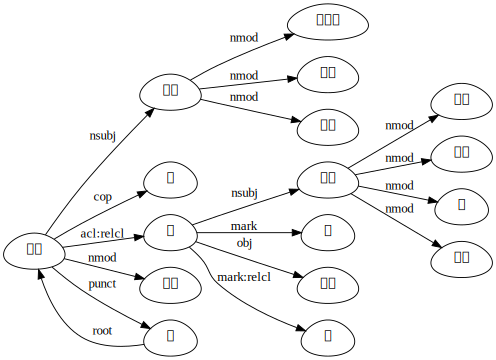

In [2]:
sagas.dia('zh').ana_s('達沃斯世界經濟論壇是每年全球政商界領袖聚在一起的年度盛事。')

In [7]:
import random
random.randint(0,1)

0

index: 1	text: I 	lemma: I	upos: PRON	xpos: PRP
index: 2	text: am 	lemma: be	upos: AUX	xpos: VBP
index: 3	text: a 	lemma: a	upos: DET	xpos: DT
index: 4	text: student 	lemma: student	upos: NOUN	xpos: NN
I -> nsubj, 4, student
am -> cop, 4, student
a -> det, 4, student
student -> root, 0, _root_
('I', '4', 'nsubj')
('am', '4', 'cop')
('a', '4', 'det')
('student', '0', 'root')


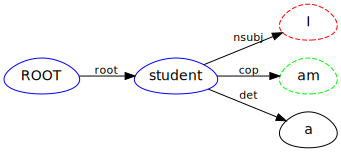

In [4]:
from sagas.nlu.uni_viz import viz
viz('I am a student', 'en')

index: 1	text: it 	lemma: it	upos: PRON	xpos: PRP
index: 2	text: is 	lemma: be	upos: AUX	xpos: VBZ
index: 3	text: a 	lemma: a	upos: DET	xpos: DT
index: 4	text: cat 	lemma: cat	upos: NOUN	xpos: NN
it -> nsubj, 4, cat
is -> cop, 4, cat
a -> det, 4, cat
cat -> root, 0, _root_
('it', '4', 'nsubj')
('is', '4', 'cop')
('a', '4', 'det')
('cat', '0', 'root')


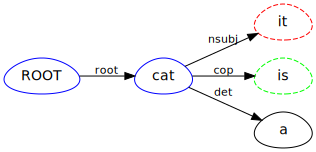

In [5]:
viz('it is a cat', 'en')